<a href="https://colab.research.google.com/github/2SUBDA/Breakouts/blob/Week9/Week9_Keras_Complex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# BASIC WALK THROUGH FOR SIMPLE MNIST NN
# BASED ON TENSORFLOW TUTORIALS (2020)

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib.pyplot as plt
import time

In [24]:
# SET HYPER-PARAMETERS

num_classes = 10
input_shape = (28, 28, 1)

In [25]:
# OBTAIN - THERE ARE MANY WAYS TO OBTAIN MNIST - THIS IS ONE

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


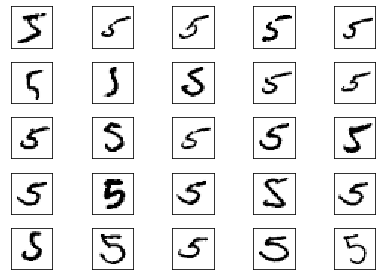

In [26]:
# EXPLORE - VISUALIZE DIFFERENT VARIATIONS OF 5

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = x_train[y_train == 5][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()


In [27]:
# SCRUB - THERE ARE MANY WAYS TO SHAPE THE DATE
# IN THIS CASE WE REALLY WANT 28 x 28
# AND WE WANT INTENSITY FROM 0-1

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
# SCRUB - THERE ARE MANY WAY TO ENCODE THE LABEL
# THIS IS ONE

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [29]:
# MODEL - BUILD THE COMPLEX

def complex_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=input_shape))
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation="softmax"))
    #COMPILE MODEL
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model


In [7]:
# MODEL - FIT THE BASE MODEL

# NEW HYPERPARAMETERS

batch_size = 200
epochs = 5

start = time.time()  # TRACK TIME

model = complex_model()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# MODEL - RESULTS

score = model.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

end = time.time()
final_time = end-start
print(final_time)  # RUN TIME OF BLOCK

Epoch 1/5
270/270 [==============================] - 3s 10ms/step - loss: 0.4700 - accuracy: 0.8567 - val_loss: 0.1030 - val_accuracy: 0.9722
Epoch 2/5
270/270 [==============================] - 3s 10ms/step - loss: 0.1319 - accuracy: 0.9603 - val_loss: 0.0667 - val_accuracy: 0.9825
Epoch 3/5
270/270 [==============================] - 3s 9ms/step - loss: 0.0969 - accuracy: 0.9708 - val_loss: 0.0524 - val_accuracy: 0.9863
Epoch 4/5
270/270 [==============================] - 3s 10ms/step - loss: 0.0826 - accuracy: 0.9745 - val_loss: 0.0460 - val_accuracy: 0.9882
Epoch 5/5
270/270 [==============================] - 3s 9ms/step - loss: 0.0711 - accuracy: 0.9779 - val_loss: 0.0449 - val_accuracy: 0.9882
Baseline Error: 1.16%
26.05335307121277


Now that we know the model runs and performs pretty well - lets save the results and look at one of the performance plots

In [10]:
# MODEL - RUN THE MODEL AND SAVE THE RESULTS

model = complex_model()
# ADJUST HYPERPARAMETERS

batch_size = 200
epochs = 100

# FIT THE MODEL
# STORE THE MODEL RESULTS IN history TO USE FOR BUILDING ROC PLOT

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# EVALUATE THE MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Epoch 1/100
270/270 [==============================] - 3s 11ms/step - loss: 0.4644 - accuracy: 0.8590 - val_loss: 0.0958 - val_accuracy: 0.9755
Epoch 2/100
270/270 [==============================] - 3s 9ms/step - loss: 0.1288 - accuracy: 0.9608 - val_loss: 0.0655 - val_accuracy: 0.9823
Epoch 3/100
270/270 [==============================] - 3s 10ms/step - loss: 0.0960 - accuracy: 0.9715 - val_loss: 0.0513 - val_accuracy: 0.9867
Epoch 4/100
270/270 [==============================] - 3s 10ms/step - loss: 0.0795 - accuracy: 0.9758 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 5/100
270/270 [==============================] - 3s 10ms/step - loss: 0.0690 - accuracy: 0.9787 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 6/100
270/270 [==============================] - 3s 10ms/step - loss: 0.0637 - accuracy: 0.9800 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 7/100
270/270 [==============================] - 3s 10ms/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0370 - val_accuracy: 

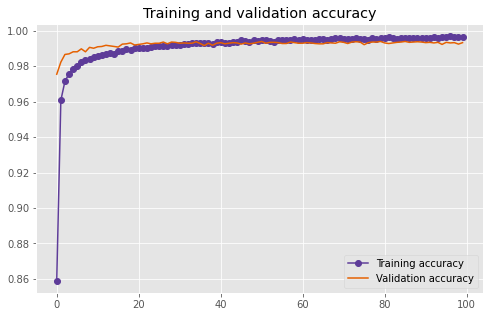

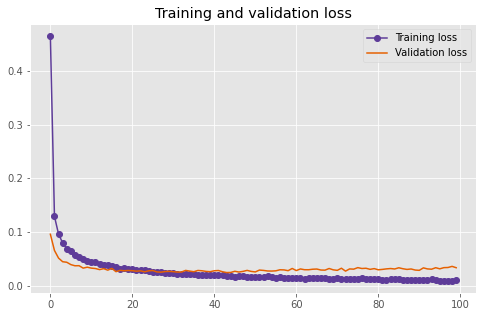

In [11]:
# INTERPRET 
# BUILD FUNCTION FOR PLOTTING THE RESULTS OF THE MODEL

def plot_train_curve(history):
    colors = ['#e66101','#fdb863','#b2abd2','#5e3c99']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(accuracy))
    with plt.style.context("ggplot"):
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, accuracy, marker='o', c=colors[3], label='Training accuracy')
        plt.plot(epochs, val_accuracy, c=colors[0], label='Validation accuracy')
        plt.title('Training and validation accuracy')
        plt.legend()
        plt.figure(figsize=(8, 8/1.618))
        plt.plot(epochs, loss, marker='o', c=colors[3], label='Training loss')
        plt.plot(epochs, val_loss, c=colors[0], label='Validation loss')
        plt.title('Training and validation loss')
        plt.legend()
        plt.show()
    
plot_train_curve(history)

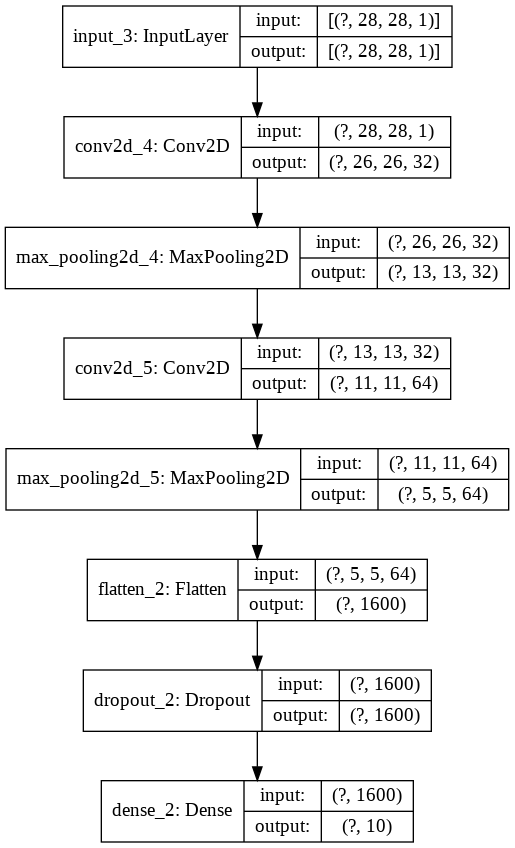

In [14]:
# MODEL - TWO WAYS TO VISUALIZE

keras.utils.plot_model(model, show_shapes=True)
# print(model.summary())